# Implementing Logistic Regression 

In [36]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_16708\171121386.py:1: SyntaxWarning: invalid escape sequence '\D'
  rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')


| Feature         | Description                                                                                                  |
|-----------------|--------------------------------------------------------------------------------------------------------------|
| Date            | The date of observation                                                                                       |
| Location        | The common name of the location of the weather station                                                        |
| MinTemp         | The minimum temperature in degrees Celsius                                                                    |
| MaxTemp         | The maximum temperature in degrees Celsius                                                                    |
| Rainfall        | The amount of rainfall recorded for the day in mm                                                             |
| Evaporation     | The Class A pan evaporation (mm) in the 24 hours to 9am                                                       |
| Sunshine        | The number of hours of bright sunshine in the day                                                             |
| WindGustDir     | The direction of the strongest wind gust in the 24 hours to midnight                                          |
| WindGustSpeed   | The speed (km/h) of the strongest wind gust in the 24 hours to midnight                                       |
| WindDir9am      | Direction of the wind at 9am                                                                                  |
| WindDir3pm      | Direction of the wind at 3pm                                                                                  |
| WindSpeed9am    | Wind speed (km/h) averaged over 10 minutes prior to 9am                                                       |
| WindSpeed3pm    | Wind speed (km/h) averaged over 10 minutes prior to 3pm                                                       |
| Humidity9am     | Humidity (percent) at 9am                                                                                     |
| Humidity3pm     | Humidity (percent) at 3pm                                                                                     |
| Pressure9am     | Atmospheric pressure (hPa) reduced to mean sea level at 9am                                                   |
| Pressure3pm     | Atmospheric pressure (hPa) reduced to mean sea level at 3pm                                                   |
| Cloud9am        | Fraction of sky obscured by cloud at 9am, measured in "oktas" (eighths of the sky obscured by cloud)          |
| Cloud3pm        | Fraction of sky obscured by cloud at 3pm, measured in "oktas" (eighths of the sky obscured by cloud)          |
| Temp9am         | Temperature (degrees Celsius) at 9am                                                                         |
| Temp3pm         | Temperature (degrees Celsius) at 3pm                                                                         |
| RainToday       | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0                             |
| RainTomorrow    | The amount of next day rain in mm. Used to create the response variable RainTomorrow ("risk" measure)         |


In [4]:
rain_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analying the unique values

In [6]:
for i in rain_df.drop(columns=['Date']).columns :
    if(rain_df[i].dtype==object):
        print(f"Unique Values in {i} is :{rain_df[i].unique()}")

Unique Values in Location is :['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique Values in WindGustDir is :['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique Values in WindDir9am is :['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique Values in WindDir3pm is :['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique Values in Ra

In [7]:
null_count=[]
for i in rain_df.columns:
    null_count.append(rain_df[i].isnull().sum())
    print(f"Null Values in {i} are : {rain_df[i].isnull().sum()}")
null_list=pd.Series(null_count,index=[x for x in rain_df.columns])

Null Values in Date are : 0
Null Values in Location are : 0
Null Values in MinTemp are : 1485
Null Values in MaxTemp are : 1261
Null Values in Rainfall are : 3261
Null Values in Evaporation are : 62790
Null Values in Sunshine are : 69835
Null Values in WindGustDir are : 10326
Null Values in WindGustSpeed are : 10263
Null Values in WindDir9am are : 10566
Null Values in WindDir3pm are : 4228
Null Values in WindSpeed9am are : 1767
Null Values in WindSpeed3pm are : 3062
Null Values in Humidity9am are : 2654
Null Values in Humidity3pm are : 4507
Null Values in Pressure9am are : 15065
Null Values in Pressure3pm are : 15028
Null Values in Cloud9am are : 55888
Null Values in Cloud3pm are : 59358
Null Values in Temp9am are : 1767
Null Values in Temp3pm are : 3609
Null Values in RainToday are : 3261
Null Values in RainTomorrow are : 3267


Comparing the Null Values Counts

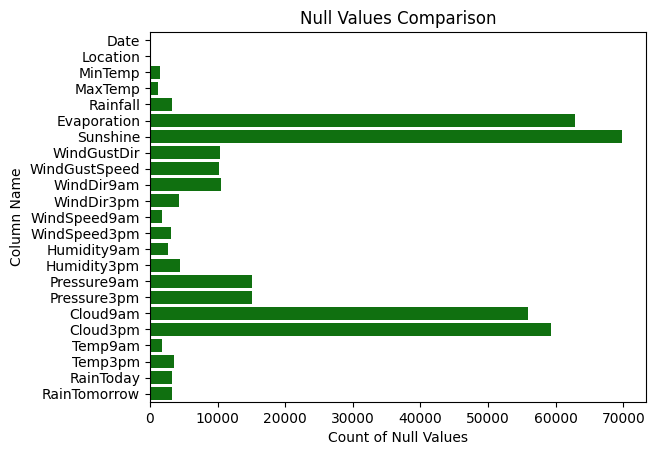

In [35]:
plt.title("Null Values Comparison")
plt.xlabel("Count of Null Values")
plt.ylabel("Column Name")
sns.barplot(x=null_list,y=null_list.index,color='green');

Here it is important to note that the Target Columns have some Null values so it can't be used to train our final model. Dropping Sample values for which the  target columnn is empty

In [9]:
rain_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

Here we have dropped all the null samples from RainToday as well as RainTomorrow as Raintoday plays a major part in determining whether it would rain tommorrow

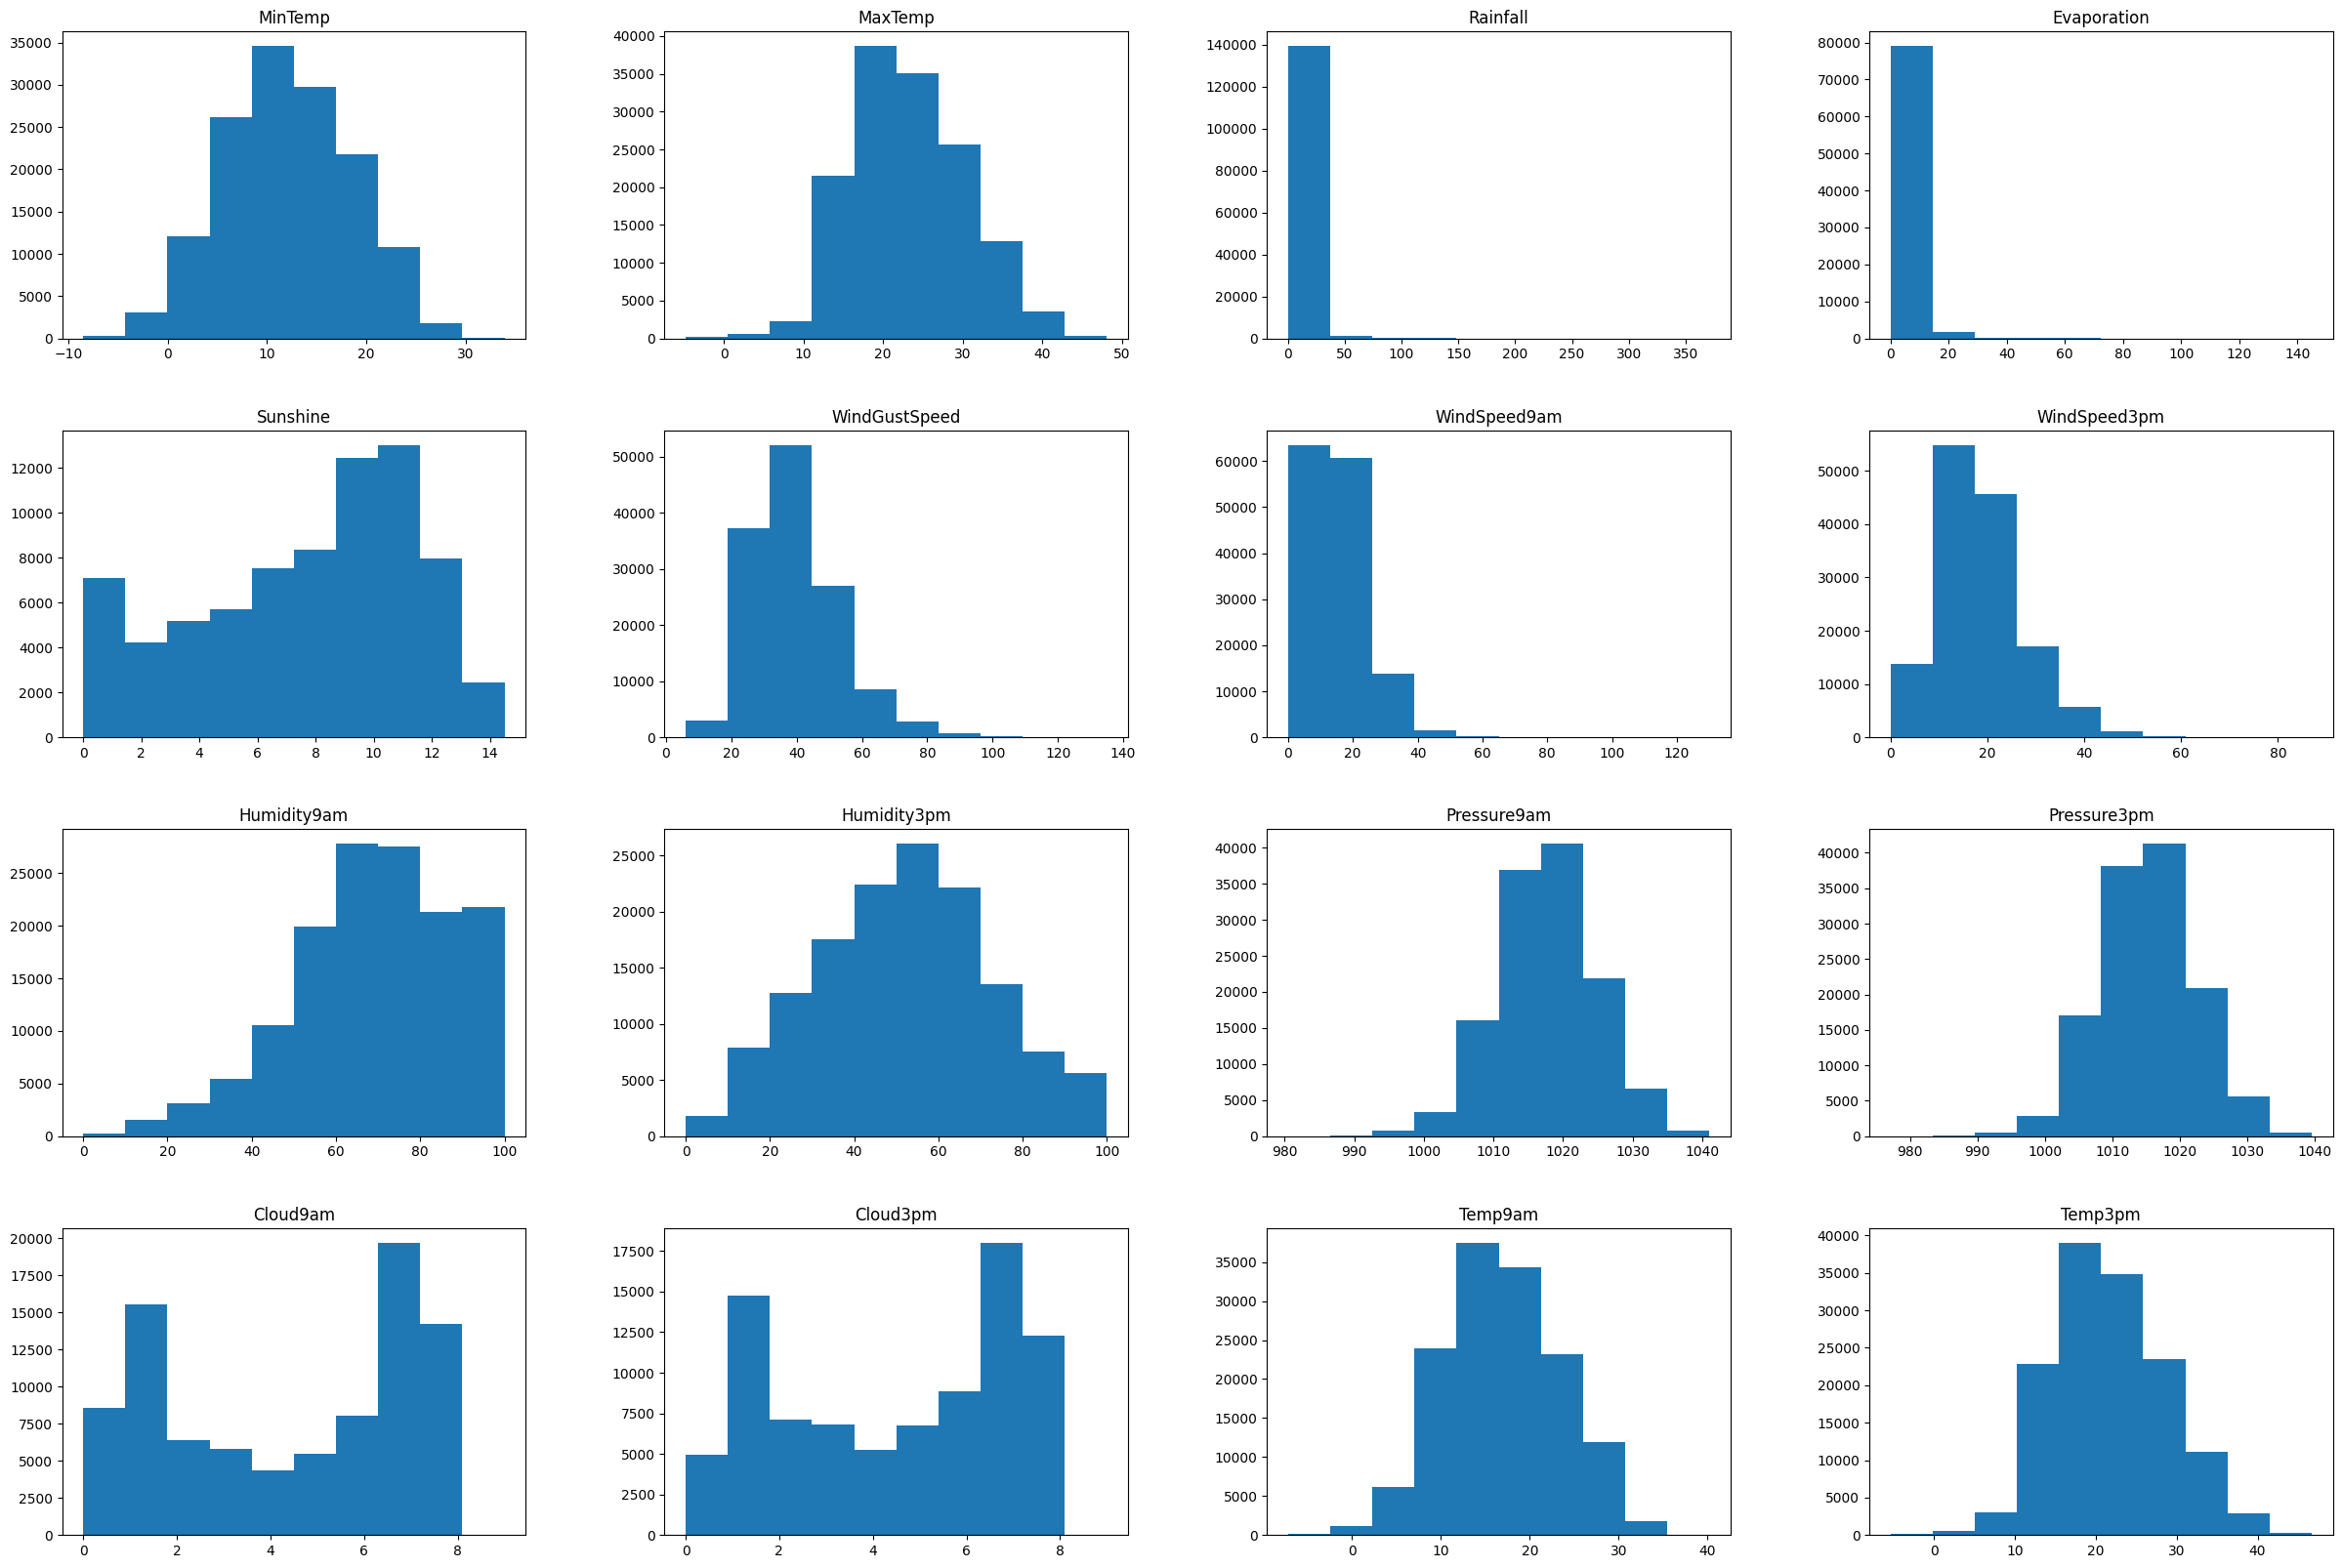

In [10]:
# plt.title("Distribution of Features in the Data")
rain_df.hist(grid=False,figsize=(30,20));

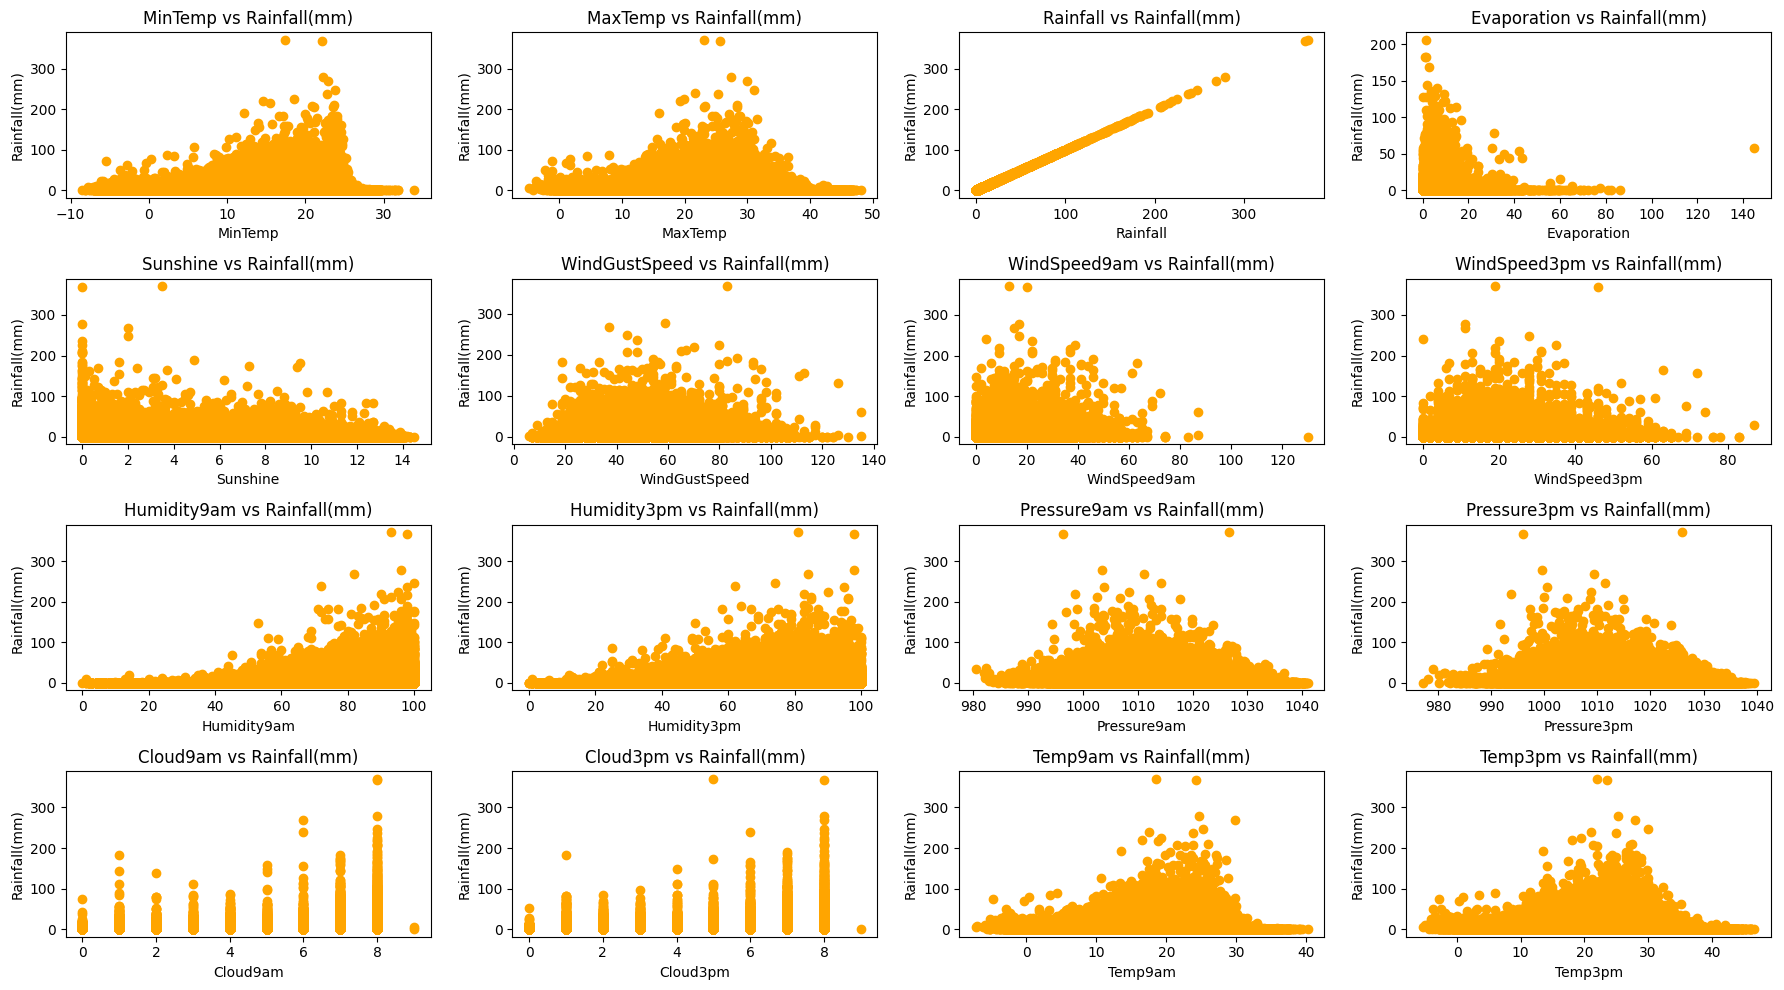

In [61]:
features = [x for x in rain_df.columns if(rain_df[x].dtype!=object)]
fig, axs = plt.subplots(4, 4, figsize=(18, 10)) 
# Important Step
axs = axs.flatten()
for i, feature in enumerate(features):
    axs[i].scatter(rain_df[feature], rain_df['Rainfall'], color='orange', marker='o')
    axs[i].set_title(f'{feature} vs Rainfall(mm)')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Rainfall(mm)')
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

##### Above it also becomes important to consider the Location where measurements are made as they can affect the average temp and other factors being recorded around that given area

In [53]:
fig=px.histogram(rain_df,x=rain_df['Location'],color='RainToday',title="Location-Wise Record Distribution")
fig.show()

##### Comparing how the Rain-tommorrow affects the Rain today Graph

In [58]:
fig=px.histogram(rain_df,x='RainTomorrow',color='RainToday')
fig.show()

It can be concluded that there are more number of samples where if raintoday=No then rainTomorrow is most probably=No